<a href="https://colab.research.google.com/github/bhaskoro-muthohar/DataScienceLearning/blob/master/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [0]:
df = pd.read_csv("Pokemon.csv")

In [0]:
print(format(df.head()))

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
0  1  Bulbasaur              Grass  Poison  318    45  49      49       65       65       45     1           False    
1  2  Ivysaur                Grass  Poison  405    60  62      63       80       80       60     1           False    
2  3  Venusaur               Grass  Poison  525    80  82      83       100      100      80     1           False    
3  3  VenusaurMega Venusaur  Grass  Poison  625    80  100     123      122      120      80     1           False    
4  4  Charmander             Fire   NaN     309    39  52      43       60       50       65     1           False    


In [0]:
print(df.tail())

       #                 Name   Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
795  719  Diancie              Rock     Fairy  600    50  100     150      100      150      50     6           True     
796  719  DiancieMega Diancie  Rock     Fairy  700    50  160     110      160      110      110    6           True     
797  720  HoopaHoopa Confined  Psychic  Ghost  600    80  110     60       150      130      70     6           True     
798  720  HoopaHoopa Unbound   Psychic  Dark   680    80  160     60       170      130      80     6           True     
799  721  Volcanion            Fire     Water  600    80  110     120      130      90       70     6           True     


In [0]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


We have high variance here

In [0]:
df.describe(include=['object'])

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,AegislashShield Forme,Water,Flying
freq,1,112,97


We should drop Type 2 because it's contain NaN

In [0]:
print (df.isna().any(axis=0))

#             False
Name          False
Type 1        False
Type 2        True 
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool


In [0]:
print(df.isnull().sum())

#             0  
Name          0  
Type 1        0  
Type 2        386
Total         0  
HP            0  
Attack        0  
Defense       0  
Sp. Atk       0  
Sp. Def       0  
Speed         0  
Generation    0  
Legendary     0  
dtype: int64


In [0]:
Type2_null = df[df.isna().any(axis=1)]

In [0]:
print(Type2_null)

       #        Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
4    4    Charmander  Fire    NaN    309    39   52      43       60       50       65     1           False    
5    5    Charmeleon  Fire    NaN    405    58   64      58       80       65       80     1           False    
9    7    Squirtle    Water   NaN    314    44   48      65       50       64       43     1           False    
10   8    Wartortle   Water   NaN    405    59   63      80       65       80       58     1           False    
11   9    Blastoise   Water   NaN    530    79   83      100      85       105      78     1           False    
..  ..          ...     ...   ...    ...    ..   ..      ...      ..       ...      ..    ..             ...    
775  705  Sliggoo     Dragon  NaN    452    68   75      53       83       113      60     6           False    
776  706  Goodra      Dragon  NaN    600    90   100     70       110      150      80     6    

It's should not causing a problem because we will use the stats instead of the Types

#Viz

In [0]:
# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 3
matplotlib.rcParams['figure.dpi'] = 200

In [0]:
df = df.assign(Legendary_int = df['Legendary'].astype(int))

In [0]:
# Getting data of pokemon that has tittle Legendary and not
legendarydf = df[df['Legendary_int']==1]
notlegendarydf = df[df['Legendary_int']==0]
print('legendarydf:\n{}'.format(legendarydf))

# Getting the shapes and number of the pokemon
print('shape of Legendary Pokemon:{}'.format(legendarydf.shape))
print('shape of not-Legendary Pokemon:{}'.format(notlegendarydf.shape))

legendarydf:
       #                 Name    Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  Legendary_int
156  144  Articuno             Ice       Flying    580    90   85      100      95       125      85     1           True       1            
157  145  Zapdos               Electric  Flying    580    90   90      85       125      90       100    1           True       1            
158  146  Moltres              Fire      Flying    580    90   100     90       125      85       90     1           True       1            
162  150  Mewtwo               Psychic   NaN       680    106  110     90       154      90       130    1           True       1            
163  150  MewtwoMega Mewtwo X  Psychic   Fighting  780    106  190     100      154      100      130    1           True       1            
..   ...                  ...      ...        ...  ...    ...  ...     ...      ...      ...      ...   ..            ...      ..      

##Viz Legendary vs Non-Legendary

0    735
1    65 
Name: Legendary_int, dtype: int64


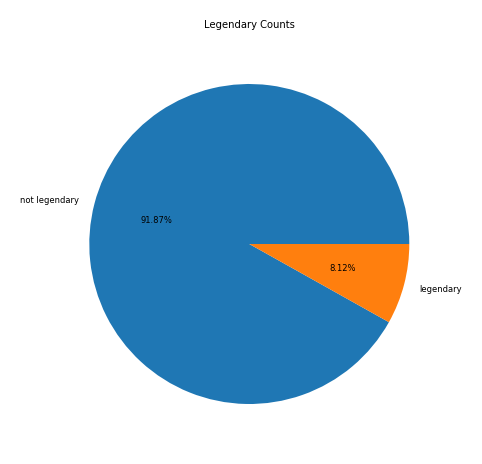

In [0]:
# Getting the count of people that leave and not
legendarycounts=df['Legendary_int'].value_counts()
print(legendarycounts)

# Using matplotlib pie chart and label the pie chart
sizes = np.array([735, 677])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(legendarycounts, labels = ['not legendary','legendary'],autopct='%1.2f%%')
fig.set_size_inches(2,2)
ax.set(aspect="equal", title='Legendary Counts')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/usr/

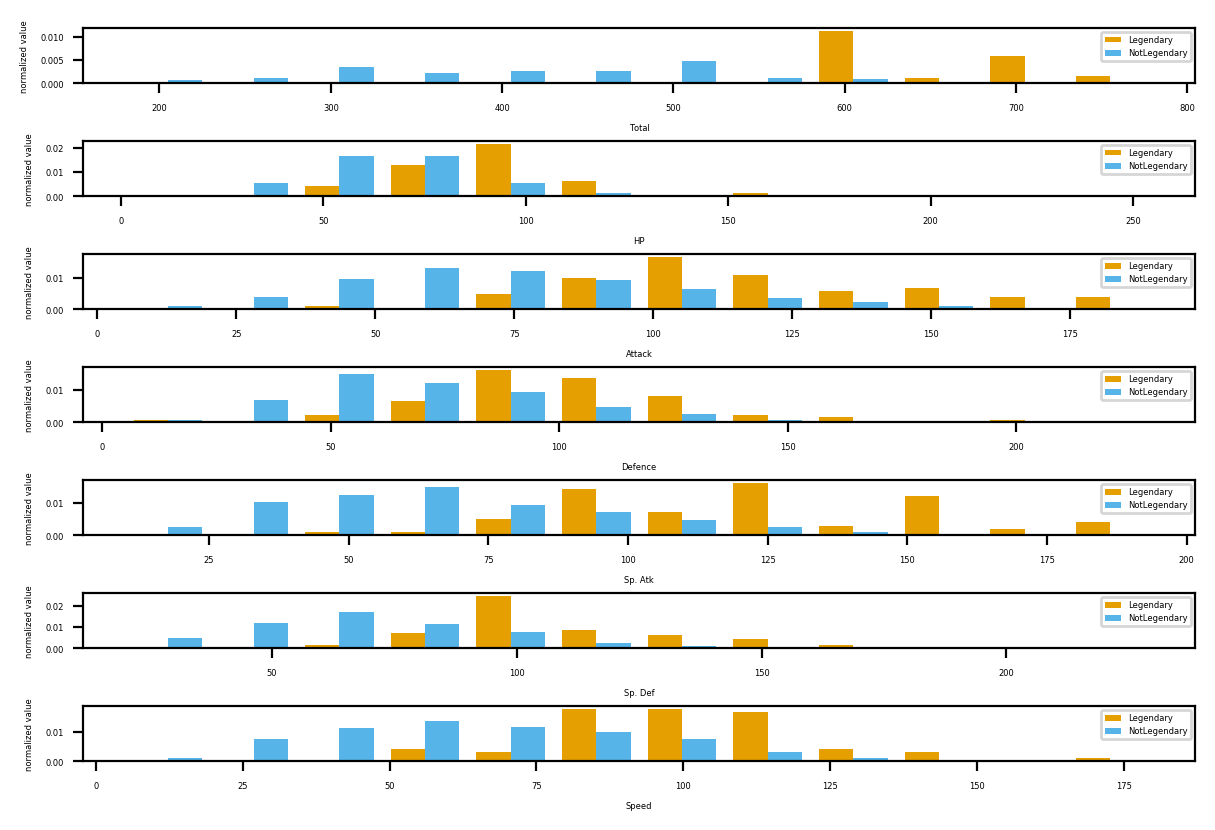

In [0]:
#make seperated list for satisfaction level
x1 = list(legendarydf['Total'])
x2 = list(notlegendarydf['Total'])

#make seperated list for last evaluation
x3 = list(legendarydf['HP'])
x4 = list(notlegendarydf['HP'])

#make seperated list for number project
x5 = list(legendarydf['Attack'])
x6 = list(notlegendarydf['Attack'])

#make seperated list for average monthly hours
x7 = list(legendarydf['Defense'])
x8 = list(notlegendarydf['Defense'])

#make seperated list for time spent company
x9 = list(legendarydf['Sp. Atk'])
x10 = list(notlegendarydf['Sp. Atk'])

#make seperated list for time spent company
x11 = list(legendarydf['Sp. Def'])
x12 = list(notlegendarydf['Sp. Def'])

#make seperated list for time spent company
x13 = list(legendarydf['Speed'])
x14 = list(notlegendarydf['Speed'])


#assign color and names
colors = ['#E69F00', '#56B4E9']
names = ['Legendary', 'NotLegendary']

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(711)
plt.hist([x1,x2], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('Total')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(712)
plt.hist([x3,x4], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('HP')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(713)
plt.hist([x5,x6], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('Attack')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(714)
plt.hist([x7,x8], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('Defence')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(715)
plt.hist([x9,x10], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('Sp. Atk')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(716)
plt.hist([x11,x12], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('Sp. Def')
plt.ylabel('normalized value')

# Make the histogram using a list of lists
#Normalize and assign colors and names
plt.subplot(717)
plt.hist([x13,x14], bins=12, normed=True, color=colors, label=names)
#plot formatting
plt.legend()
plt.xlabel('Speed')
plt.ylabel('normalized value')

plt.subplots_adjust(top=11 ,bottom=10)
plt.tight_layout()
plt.show()

(-1.102045510971046, 1.10009740637079, -1.1022521551893325, 1.1194342309553083)

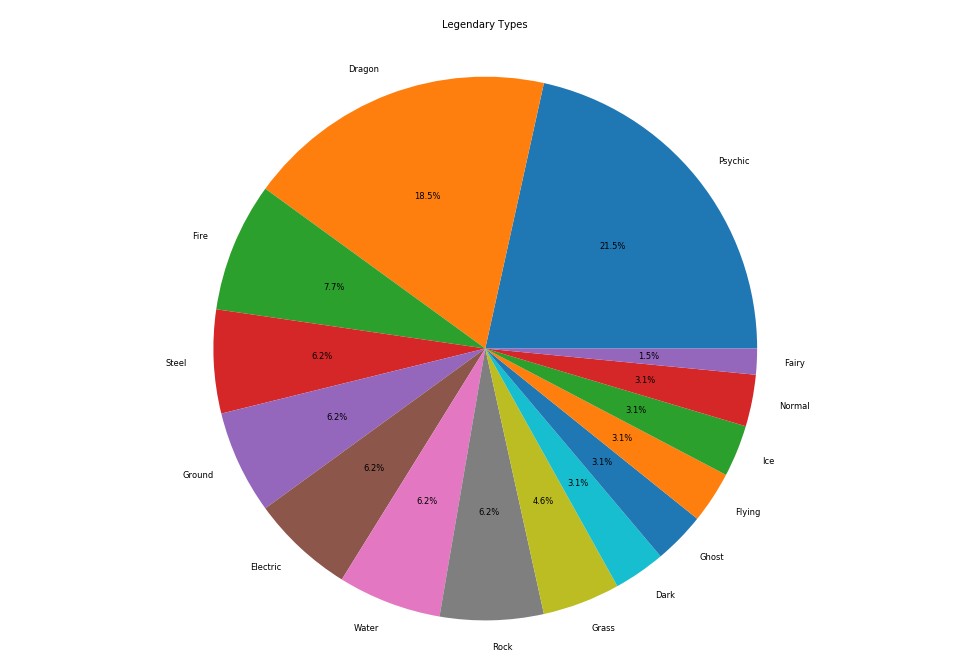

In [0]:
# Do the value counts of department counts
legendarytypecounts = legendarydf['Type 1'].value_counts()

plt.subplot(111)
plt.pie(legendarytypecounts, labels=legendarytypecounts.index, autopct='%1.1f%%')
plt.title('Legendary Types')
plt.axis('equal')

#Correlation Analysis

In [0]:
corr = legendarydf.drop('Legendary_int',axis=1).corr()

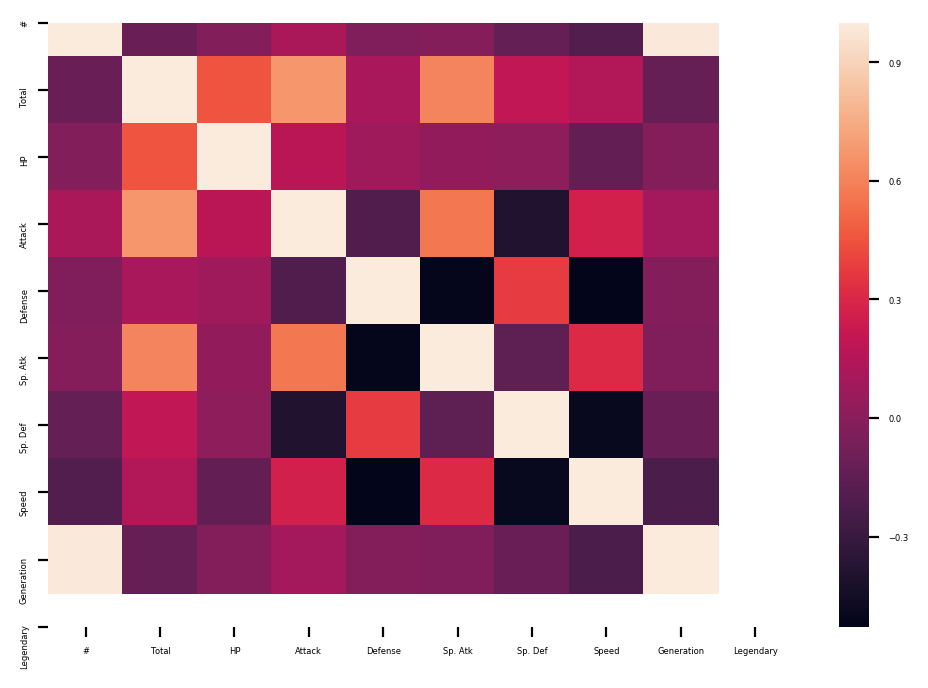

In [0]:
sns.heatmap(corr)